In [375]:

import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [376]:
data = pd.read_csv('Walmart.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# EDA

In [377]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [378]:

# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Extract features from Date
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data.drop('Date', axis=1, inplace=True)

In [379]:
# cheak missing values
data.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Day             0
dtype: int64

In [380]:
# Check Duplicate Values
data.duplicated().sum()

0

In [381]:
# Handle categorical variables and scale numeric features
numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
categorical_features = ['Store', 'Holiday_Flag', 'Year', 'Month', 'Day']

In [382]:
# Define preprocessing steps for numeric features only
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'  # Keep categorical features as they are
)

## features analysis

In [383]:
# Use a pipeline with feature selection
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_regression, k='all'))
])

X = data
y = data['Weekly_Sales']
X.drop('Weekly_Sales', axis=1, inplace=True)

# Fit the pipeline
pipeline.fit(X, y)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Temperature', 'Fuel_Price',
                                                   'CPI', 'Unemployment'])])),
                ('feature_selection',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x000001E6E14BE840>))])

In [384]:

# Retrieve feature scores
feature_scores = pipeline.named_steps['feature_selection'].scores_


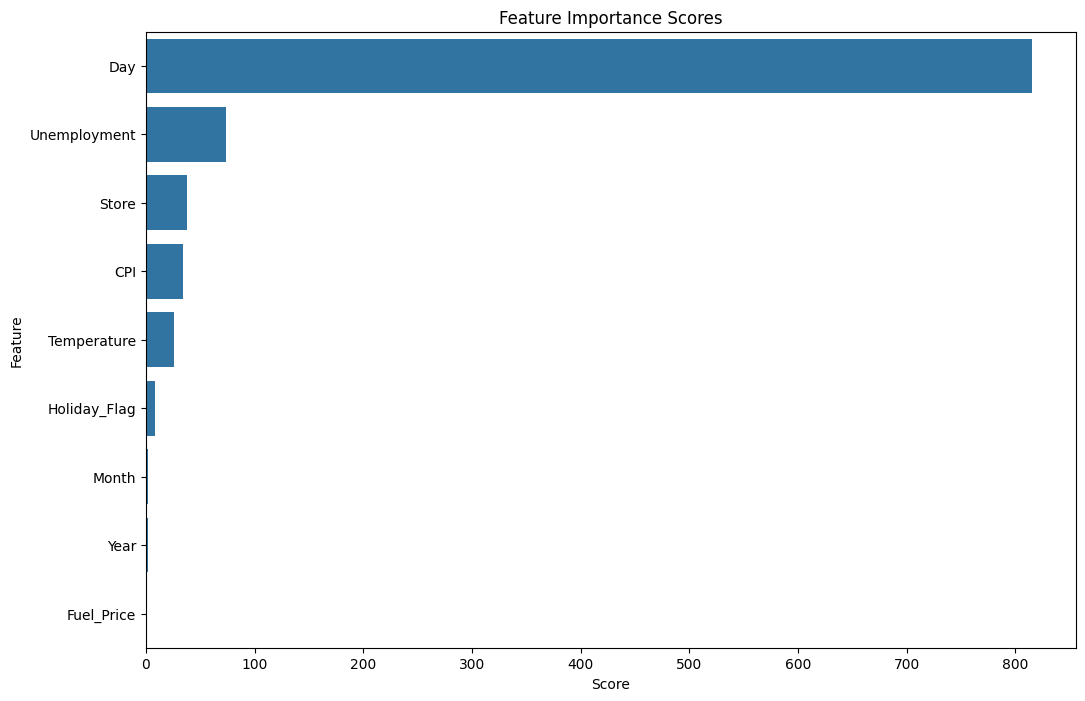

In [385]:

# Get feature names
# Numeric features are scaled and kept as is
# Categorical features are added without modification
numeric_feature_names = numeric_features
categorical_feature_names = X.columns.difference(numeric_features).tolist()
features = numeric_feature_names + categorical_feature_names
feature_importance = pd.DataFrame({'Feature': features, 'Score': feature_scores})

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=feature_importance.sort_values(by='Score', ascending=False))
plt.title('Feature Importance Scores')
plt.show()

In [386]:
selected_features = feature_importance.sort_values(by='Score', ascending=False).head(5)['Feature'].tolist()

X_selected = X[selected_features]


Dựa trên điểm số của các features từ kết quả trên, chúng ta sẽ chọn các features có điểm số cao nhất. Cụ thể, chúng ta có thể chọn các features có điểm số cao hơn một ngưỡng nhất định. Trong trường hợp này, ta có thể chọn các features có điểm số cao hơn 10

In [387]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


# ML

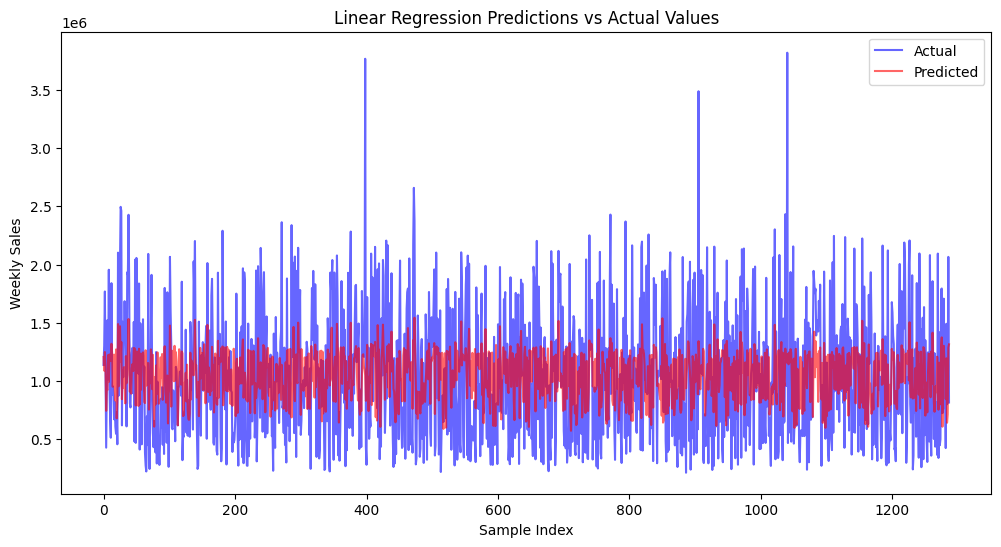

In [394]:

# Đưa dự đoán về dạng 1D nếu cần thiết
y_pred_linear = y_pred_linear.flatten()

# Vẽ đồ thị Dự đoán so với Giá trị Thực
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='blue', alpha=0.6)
plt.plot(y_pred_linear, label='Predicted', color='red', alpha=0.6)
plt.title('Linear Regression Predictions vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

Linear Regression MSE: 274847650031.41656


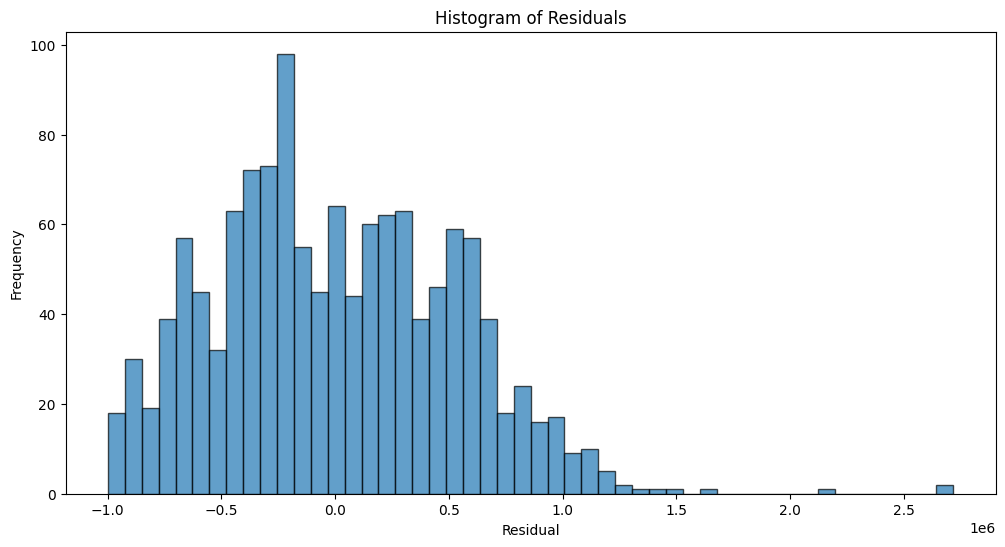

In [398]:
# Tính toán và in MSE
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear}")

# Vẽ Histogram của Residuals
residuals = y_test - y_pred_linear
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# LSTM

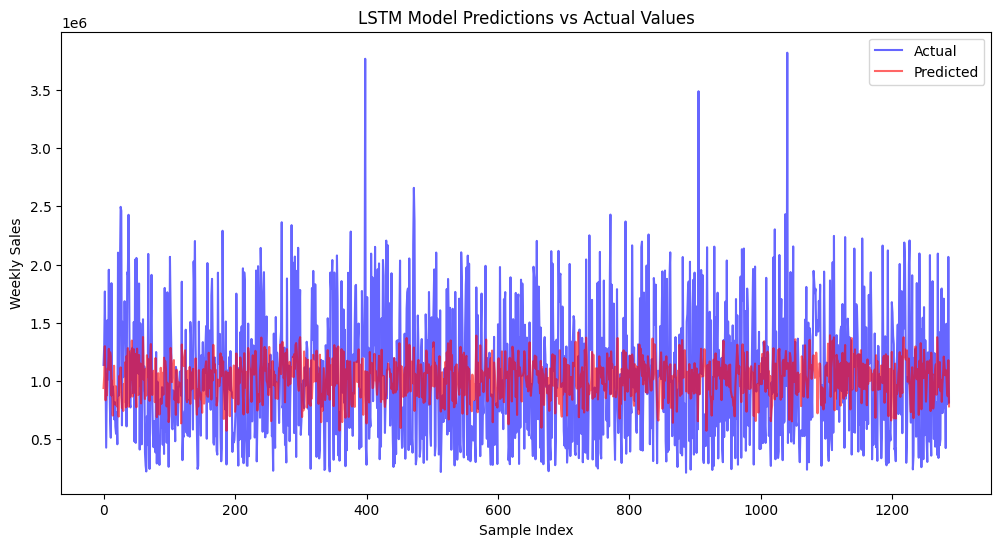

LSTM MSE: 317355958183.7761


In [396]:

# Convert predictions from LSTM
y_pred_lstm = y_pred_lstm.flatten()  # Flatten to match y_test shape

# Plot Predictions vs Actual Values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='blue', alpha=0.6)
plt.plot(y_pred_lstm, label='Predicted', color='red', alpha=0.6)
plt.title('LSTM Model Predictions vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

# Print MSE
mse = mean_squared_error(y_test, y_pred_lstm)
print(f"LSTM MSE: {mse}")

Epoch 1/200


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1435485995008.0000
Epoch 2/200
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1405831610368.0000
Epoch 3/200
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1391896035328.0000
Epoch 4/200
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1447779762176.0000
Epoch 5/200
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1402039042048.0000
Epoch 6/200
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1416841003008.0000
Epoch 7/200
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1354758881280.0000
Epoch 8/200
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1403972222976.0000
Epoch 9/200
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1362652561408.0000
Epoch 10/200
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1385714286592.0000
Epoch 11/200
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1354085695488.0000
Epoch 12/200
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1348908613632.0000
Epoch 13/200
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

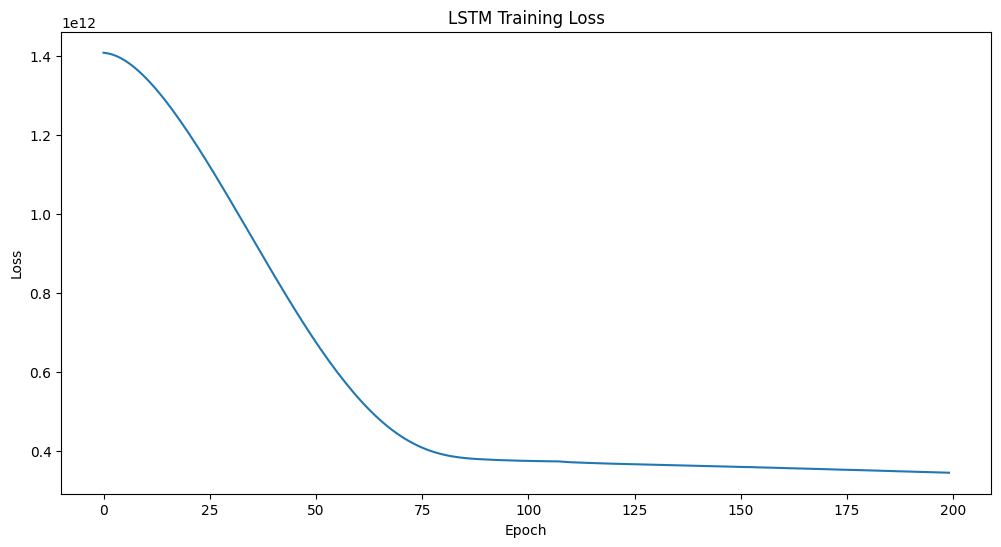

In [397]:

# Mô hình LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train model and capture history
history = model.fit(X_train_lstm, y_train, epochs=200, batch_size=32, verbose=1)

# Plot Training Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.title('LSTM Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()